<a href="https://colab.research.google.com/github/UlaNoman/CSci127/blob/master/lab4csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Upload your CSV from your computer
from google.colab import files
uploaded = files.upload()   # choose your finallab4b - Sheet1.csv file

# 2. Get the actual filename from what you just uploaded
filename = list(uploaded.keys())[0]
print("Loaded file:", filename)

# 3. Read the file
df = pd.read_csv(filename, header=None, names=["raw"])

# 4. Split "sample,value"
records = []
for s in df["raw"].dropna().astype(str):
    parts = s.split(',')
    if len(parts) >= 2:
        n = parts[0]
        x = parts[1]
        records.append((int(n), float(x)))

n = np.array([r[0] for r in records])
x = np.array([r[1] for r in records])

print("Samples loaded:", len(x))
print("First few:", list(zip(n[:5], x[:5])))


Saving finallab4b - Sheet1.csv to finallab4b - Sheet1.csv
Loaded file: finallab4b - Sheet1.csv
Samples loaded: 26677
First few: [(np.int64(1), np.float64(148.0)), (np.int64(2), np.float64(147.0)), (np.int64(3), np.float64(148.0)), (np.int64(4), np.float64(148.0)), (np.int64(5), np.float64(148.0))]


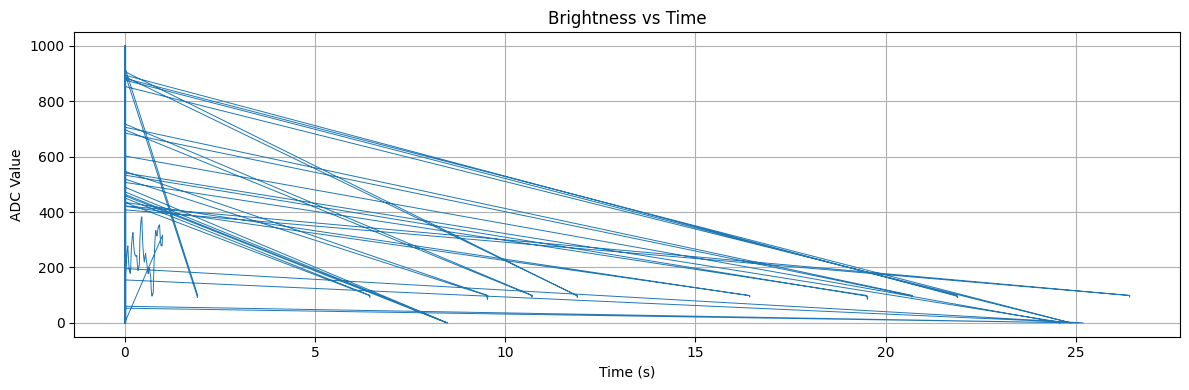

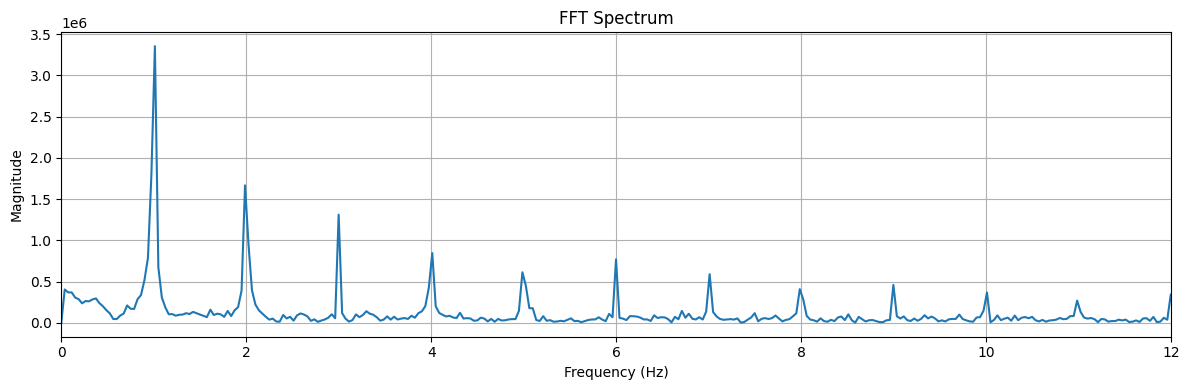


Dominant frequencies between 1 and 10 Hz:
1.012 Hz
1.987 Hz
2.024 Hz
2.999 Hz


In [11]:
# === Build time axis ===
dt = 0.001          # 1 ms between samples (from your Arduino code)
t = (n - n[0]) * dt # start time at zero

# === Detrend signal ===
x_detr = x - np.mean(x)

# === FFT ===
import numpy as np
import matplotlib.pyplot as plt

N = len(x_detr)
fs = 1 / dt
freqs = np.fft.rfftfreq(N, dt)
X = np.fft.rfft(x_detr)
mag = np.abs(X)

# === Time domain ===
plt.figure(figsize=(12,4))
plt.plot(t, x, linewidth=0.7)
plt.title("Brightness vs Time")
plt.xlabel("Time (s)")
plt.ylabel("ADC Value")
plt.grid(True)
plt.tight_layout()
plt.savefig("timeseries.png", dpi=300)
plt.show()

# === FFT spectrum ===
plt.figure(figsize=(12,4))
plt.plot(freqs, mag)
plt.xlim(0,12)
plt.title("FFT Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.tight_layout()
plt.savefig("timeseries.png", dpi=300)
plt.show()

# === 4 strongest frequencies between 1–10 Hz ===
mask = (freqs >= 1) & (freqs <= 10)
freqs_band = freqs[mask]
mag_band = mag[mask]

idx = np.argpartition(mag_band, -4)[-4:]
peak_freqs = np.sort(freqs_band[idx])

print("\nDominant frequencies between 1 and 10 Hz:")
for f in peak_freqs:
    print(f"{f:.3f} Hz")
